In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Relâmpago Marquin_two-digit-number-comparison-task_2024-11-05_19h38.54.917.csv")
new_data = data[["target_number", "condition", "left_msg", "right_msg",
                 "button_condition", "corr", "key_resp.keys", "key_resp.corr", "key_resp.rt"]]

new_data.head(3)

,target_number,condition,left_msg,right_msg,button_condition,corr,key_resp.keys,key_resp.corr,key_resp.rt
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,82.0,greater,Menor que 55,Maior que 55,left-lower/right-greater,right,right,1.0,0.465441
2,51.0,lower,Menor que 55,Maior que 55,left-lower/right-greater,left,left,1.0,0.470550


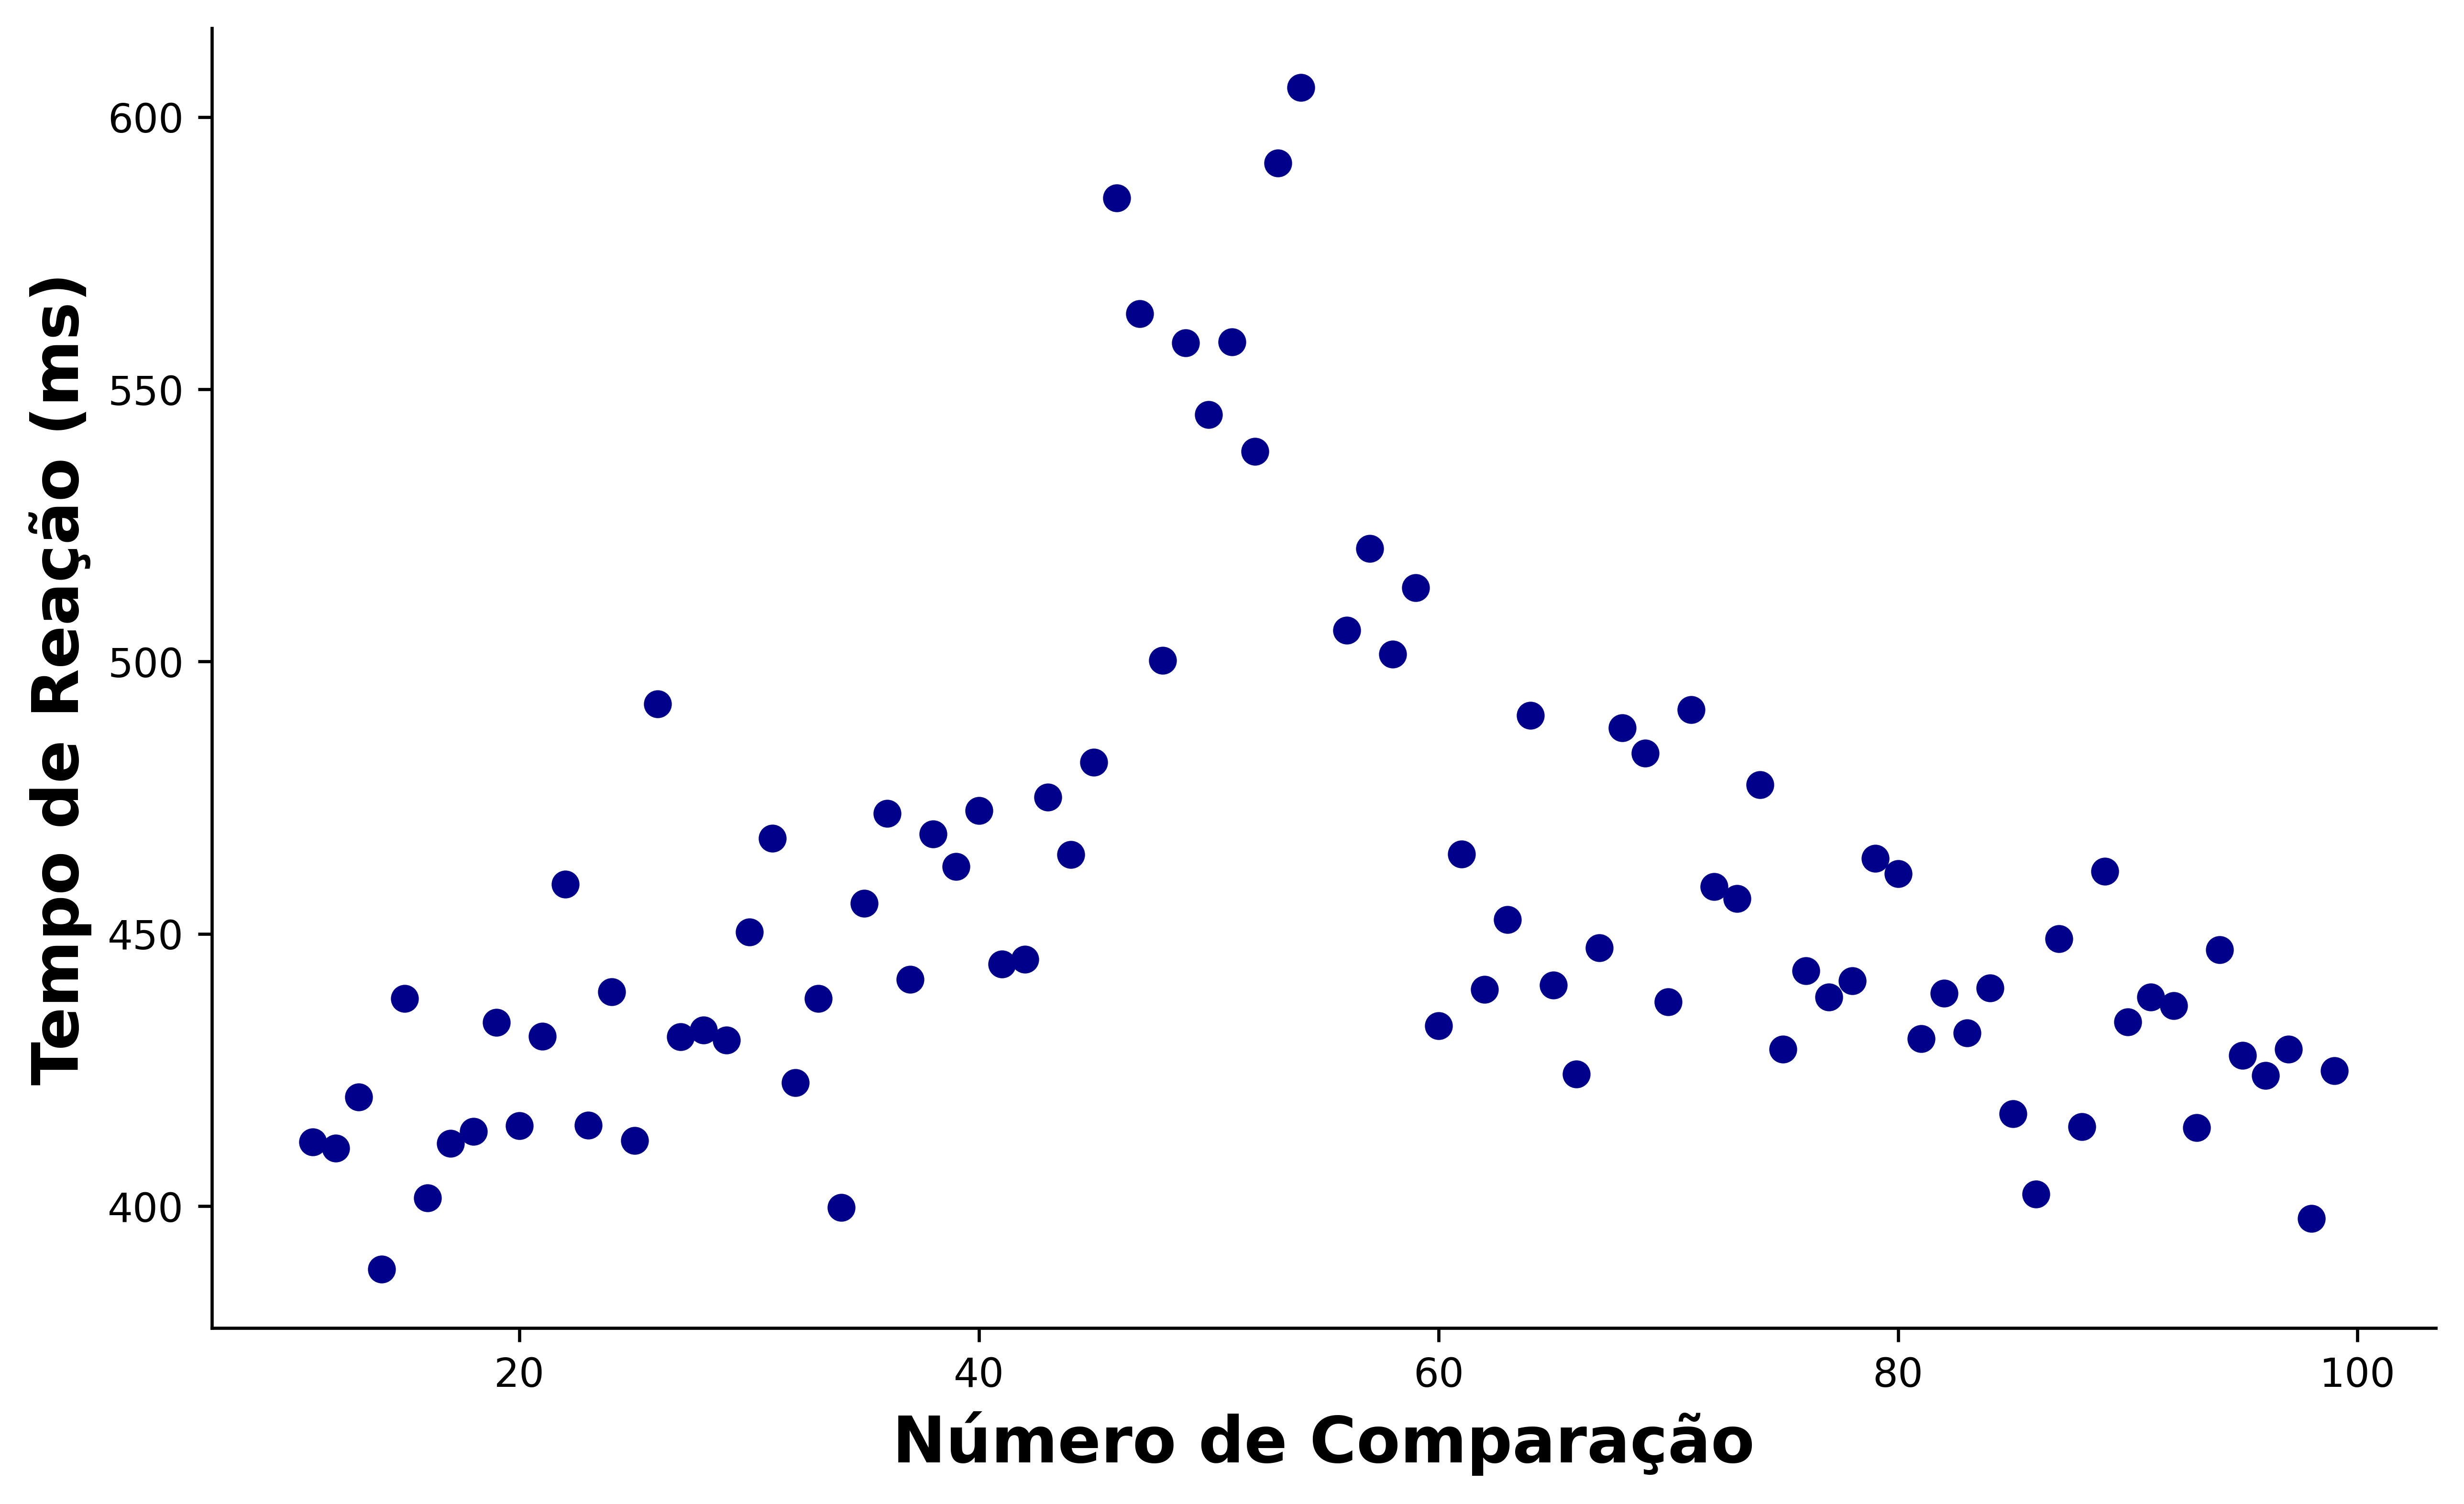

In [6]:
summary = new_data.groupby(["target_number"])["key_resp.rt"].mean()

# Transforma em DataFrame para facilitar a filtragem
summary_df = summary.reset_index()

fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 600)

ax.scatter(summary_df["target_number"], summary_df["key_resp.rt"] * 1000, color = "darkblue")
ax.set_xlabel("Número de Comparação", fontweight = "bold", fontsize = 16, color = "black")
ax.set_ylabel("Tempo de Reação (ms)", fontweight = "bold", fontsize = 16, color = "black")
ax.spines["top"].set_color(None)
ax.spines["right"].set_color(None)

plt.savefig("Figura 1.jpg", dpi = 600)

plt.show()

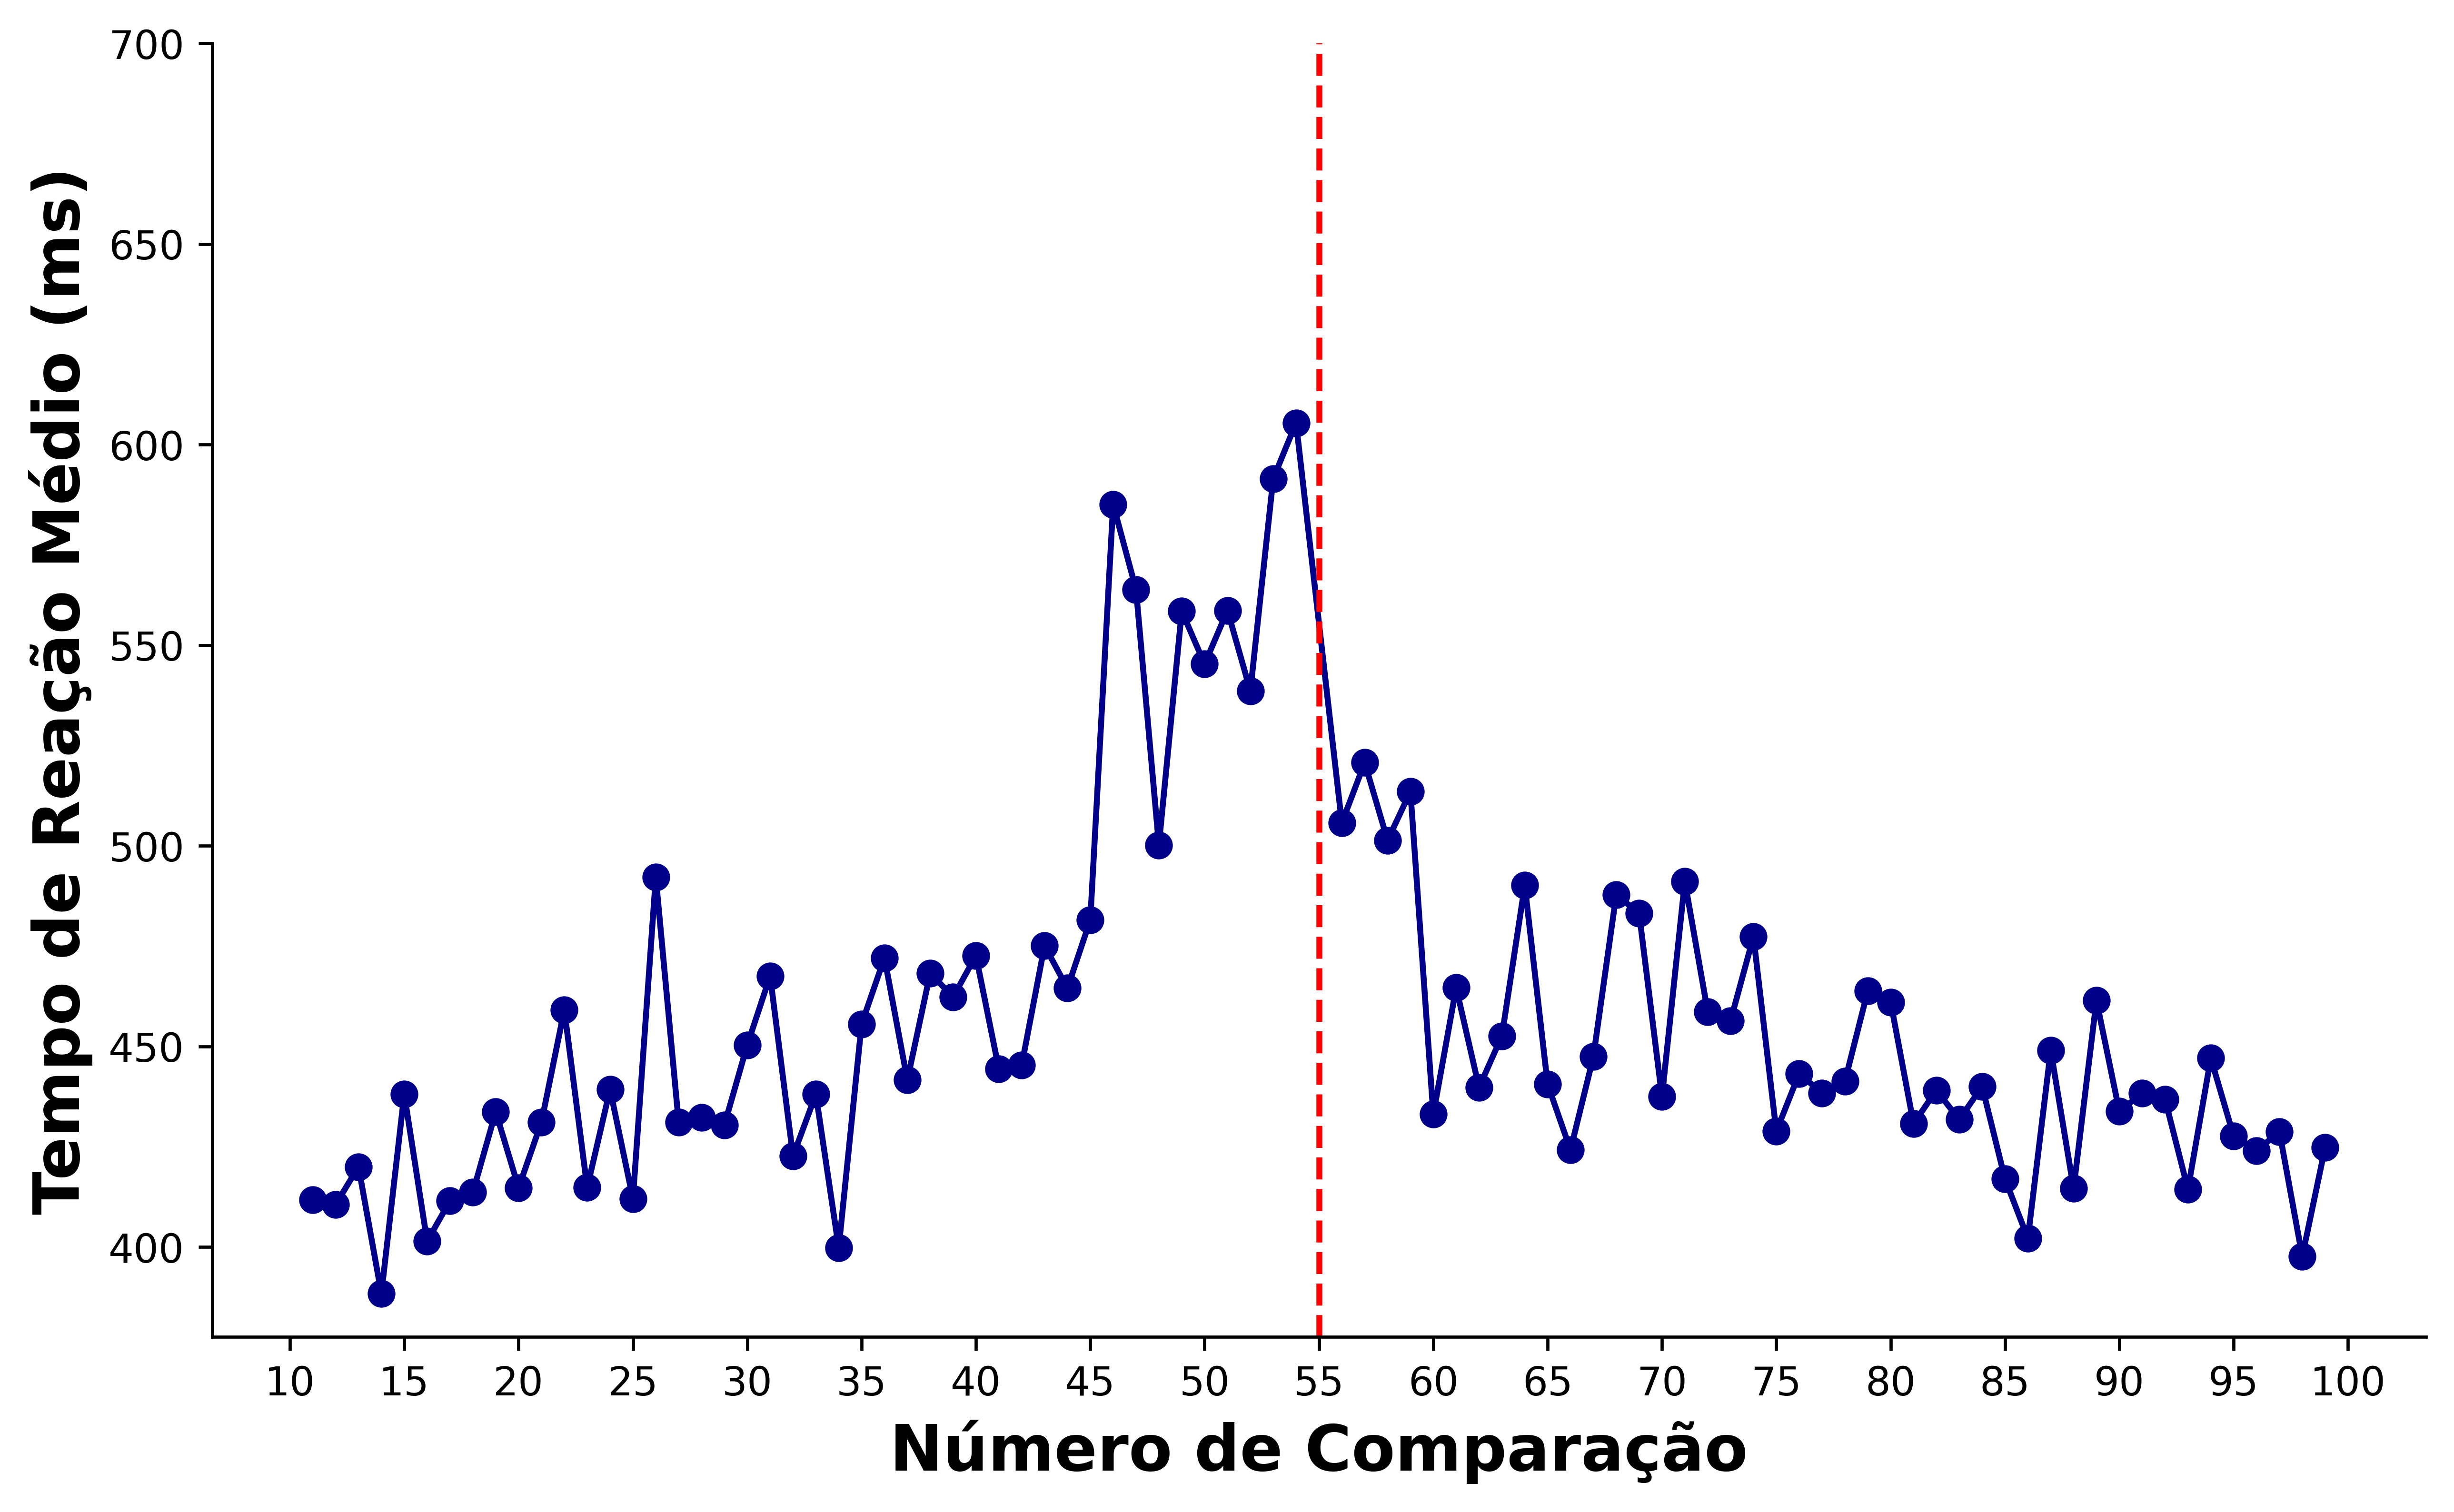

In [7]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6), dpi = 600)

ax.plot(summary_df["target_number"], summary_df["key_resp.rt"] * 1000,
        color = "darkblue", marker = "o")


ax.set_title("O Número de Comparação é Menor ou Maior Que 55?",
            fontsize = 18, fontweight = "bold", fontstyle = "italic", color = "darkblue")

ax.set_xlabel("Número de Comparação", fontweight = "bold", fontsize = 16, color = "black")
ax.set_ylabel("Tempo de Reação Médio (ms)", fontweight = "bold", fontsize = 16, color = "black")

ax.set_xticks(list(range(10, 105, 5)))
ax.set_xticklabels(list(range(10, 105, 5)), fontsize = 10)

ax.set_yticks(list(range(400, 750, 50)))
ax.set_yticklabels(list(range(400, 750, 50)), fontsize = 10)

ax.axvline(ymin = 0, ymax = 750, x = 55, ls = "--", color = "red")

ax.spines["top"].set_color(None)
ax.spines["right"].set_color(None)

plt.savefig("Figura 2.jpg", dpi = 600)
plt.show()

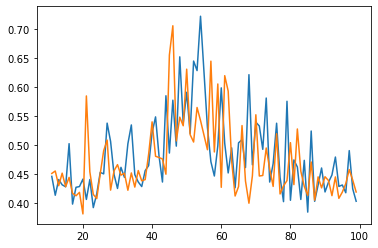

In [43]:
plt.plot(summary_LL["target_number"], summary_LL["key_resp.rt"])
plt.plot(summary_RL["target_number"], summary_RL["key_resp.rt"])
plt.show()

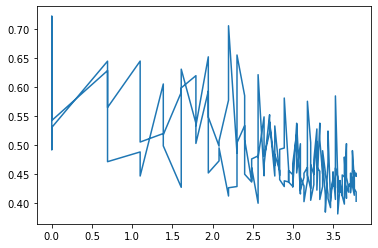

[[ 1.         -0.60590615]
 [-0.60590615  1.        ]]


In [50]:
summary_df["D"] = np.log(np.abs(55 - summary_df["target_number"]))

plt.plot(summary_df["D"], summary_df["key_resp.rt"])
plt.show()

print(np.corrcoef(summary_df["D"], summary_df["key_resp.rt"]))